In [160]:

import pandas as pd
import numpy as np
import re
import lxml
import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [170]:
df = pd.read_csv('mergedData.csv')

In [171]:
df.columns

Index(['Title', 'Year', 'Genre', 'Rating', 'Score', 'Director', 'Stars',
       'Gross', 'Popularity', 'Vote_Count', 'Id', 'Original_Language',
       'Original_Title', 'Genre_Ids', 'Vote_Average', 'Release_Date',
       'Revenue', 'Budget', 'Genre_y'],
      dtype='object')

In [172]:
df.head()
df['Stars']

0       Kang-ho Song, Sun-kyun Lee, Yeo-jeong Jo, Woo-...
1       Elisabeth Moss, Oliver Jackson-Cohen, Harriet ...
2       Daniel Craig, Chris Evans, Ana de Armas, Jamie...
3       Ben Schwartz, James Marsden, Jim Carrey, Tika ...
4       Roman Griffin Davis, Thomasin McKenzie, Scarle...
                              ...                        
3995    Jean Reno, Christina Applegate, Christian Clav...
3996    Laura Linney, Philip Seymour Hoffman, Philip B...
3997    Morris Chestnut, Regina Hall, Romany Malco, Mi...
3998    Barbra Streisand, Seth Rogen, Julene Renee, Za...
3999    Diane Keaton, Geraldine Page, Kristin Griffith...
Name: Stars, Length: 4000, dtype: object

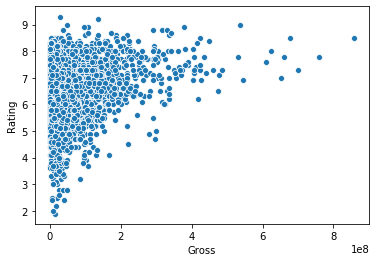

In [173]:
gross = df['Gross']
df['Log Gross']= np.log(df['Gross'])
rating = df['Rating']
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = df)

In [174]:

df = df.loc[df['Budget'] != 0]
gross = df['Gross']
df['Log Gross']= np.log(df['Gross'])
df['Budget'] = df['Budget']*1000000
df['Log Budget']= np.log(df['Budget'])
rating = df['Rating']



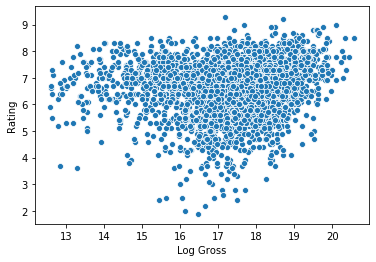

In [175]:
ax = sns.scatterplot(x = 'Log Gross',y = 'Rating', data = df)

In [176]:
df['Budget'].mean()
df['Budget'].min()
df['Gross'].min()

292437

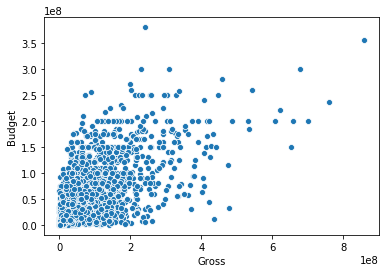

In [177]:
ax = sns.scatterplot(x = 'Gross',y = 'Budget', data = df)

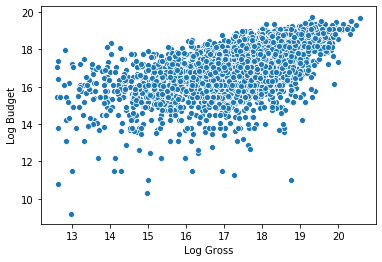

In [178]:
ax = sns.scatterplot(x = 'Log Gross',y = 'Log Budget', data = df)

In [179]:
df.corr()

,Year,Rating,Score,Gross,Popularity,Vote_Count,Id,Vote_Average,Revenue,Budget,Log Gross,Log Budget
Year,1.000000,-0.191966,-0.086640,0.099474,0.181096,0.178111,0.594113,-0.174342,0.177118,0.297573,0.020955,0.342231
Rating,-0.191966,1.000000,0.665049,0.214007,0.164264,0.396576,-0.054624,0.949644,0.197015,-0.003613,0.103729,-0.098168
Score,-0.086640,0.665049,1.000000,0.209084,0.138585,0.307372,0.005575,0.634687,0.171518,0.008833,0.123514,-0.094649
Gross,0.099474,0.214007,0.209084,1.000000,0.329683,0.714086,0.007515,0.225425,0.923418,0.628866,0.734762,0.468497
Popularity,0.181096,0.164264,0.138585,0.329683,1.000000,0.357832,0.280842,0.185065,0.330555,0.271935,0.251324,0.206149
Vote_Count,0.178111,0.396576,0.307372,0.714086,0.357832,1.000000,0.056408,0.407080,0.730470,0.530104,0.508904,0.370958
Id,0.594113,-0.054624,0.005575,0.007515,0.280842,0.056408,1.000000,0.016086,0.062985,0.038919,-0.084036,0.007955
Vote_Average,-0.174342,0.949644,0.634687,0.225425,0.185065,0.407080,0.016086,1.000000,0.209707,-0.021314,0.115463,-0.114673
Revenue,0.177118,0.197015,0.171518,0.923418,0.330555,0.730470,0.062985,0.209707,1.000000,0.700348,0.619670,0.491385
Budget,0.297573,-0.003613,0.008833,0.628866,0.271935,0.530104,0.038919,-0.021314,0.700348,1.000000,0.524173,0.787740


In [180]:
df['ROI']=df['Gross']/df['Budget']

In [181]:
df = df.loc[df['ROI']<=10]

In [182]:
score = df[['Director','Gross','Score','ROI']].groupby('Score').mean().sort_values('Gross', ascending = False)

rating = df[['Director','Gross','Rating','ROI']].groupby('Rating').mean().sort_values('Gross', ascending = False)

genres = df[['Director','Gross','Genre','ROI']].groupby('Genre').mean().sort_values('Gross', ascending = False)

df.shape

(3265, 22)

In [183]:
score['Score']=score.index
rating['Rating']=rating.index
genres['Genres']=genres.index
rating['Log Gross']=np.log(rating['Gross'])
score.reset_index(drop = True, inplace = True)
rating.reset_index(drop = True, inplace = True)
genres.reset_index(drop = True, inplace = True)

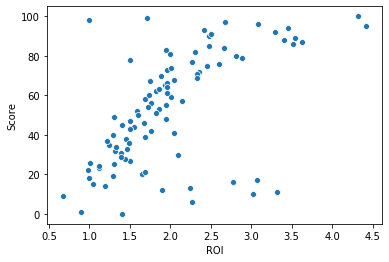

In [184]:
ax = sns.scatterplot(x = 'ROI',y = 'Score', data = score)


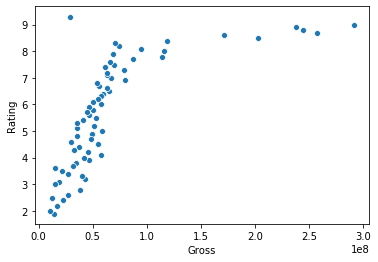

In [185]:
ax = sns.scatterplot(x = 'Gross',y = 'Rating', data = rating)


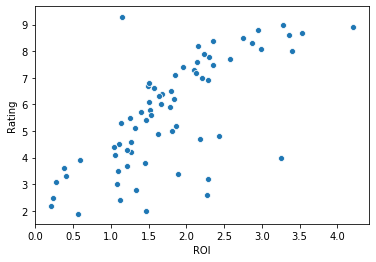

In [186]:
ax = sns.scatterplot(x = 'ROI',y = 'Rating', data = rating)



In [187]:
rating.corr()
df.head()

,Title,Year,Genre,Rating,Score,Director,Stars,Gross,Popularity,Vote_Count,...,Original_Title,Genre_Ids,Vote_Average,Release_Date,Revenue,Budget,Genre_y,Log Gross,Log Budget,ROI
0,Parasite,2019,Comedy Drama Thriller,8.6,96.0,Bong Joon Ho,"Kang-ho Song, Sun-kyun Lee, Yeo-jeong Jo, Woo-...",51479136,148.987,4756,...,기생충,"[35, 18, 53]",8.6,2019-05-30,201.06,11360000.0,"['Comedy', 'Drama', 'Thriller']",17.756687,16.245609,4.531614
1,The Invisible Man,2020,Horror Mystery Sci-Fi,7.6,71.0,Leigh Whannell,"Elisabeth Moss, Oliver Jackson-Cohen, Harriet ...",28205665,215.930,174,...,The Invisible Man,"[27, 9648, 878, 53]",7.5,2020-02-26,0.00,9000000.0,"['Horror', 'Mystery', 'Science Fiction', 'Thri...",17.155033,16.012735,3.133963
2,Knives Out,2019,Comedy Crime Drama,8.0,82.0,Rian Johnson,"Daniel Craig, Chris Evans, Ana de Armas, Jamie...",164655243,96.543,2485,...,Knives Out,"[35, 80, 18, 9648, 53]",7.8,2019-11-27,163.70,40000000.0,"['Comedy', 'Crime', 'Drama', 'Mystery', 'Thril...",18.919364,17.504390,4.116381
3,Sonic the Hedgehog,2020,Action Adventure Comedy,6.8,47.0,Jeff Fowler,"Ben Schwartz, James Marsden, Jim Carrey, Tika ...",128555045,217.757,546,...,Sonic the Hedgehog,"[28, 35, 878, 10751]",7.1,2020-02-12,265.49,85000000.0,"['Action', 'Comedy', 'Science Fiction', 'Family']",18.671868,18.258162,1.512412
4,Jojo Rabbit,2019,Comedy Drama War,8.0,58.0,Taika Waititi,"Roman Griffin Davis, Thomasin McKenzie, Scarle...",33122789,68.363,2208,...,Jojo Rabbit,"[35, 18, 10752]",8.1,2019-10-18,82.47,14000000.0,"['Comedy', 'Drama', 'War']",17.315732,16.454568,2.365914


In [188]:
df['Genre'] = df['Genre'].apply(lambda x:x.split())
df['Genre1'] = df['Genre'].apply(lambda x:x[0])


In [189]:
def genres_Split(list):
    try:
        x = list[1]
    except:
        x = list[0]
    return x
def genres_Split2(list):
    try:
        x = list[2]
    except:
        x = list[0]
    return x


In [191]:
df['Genre2'] = df['Genre'].apply(lambda x:genres_Split(x))
df['Genre3'] = df['Genre'].apply(lambda x:genres_Split2(x))



In [192]:
type(df['Stars'][0])

str

In [205]:
stars = df['Stars'].str.split(",",n=1,expand = True)

In [206]:
df['Star1'] = stars[0]

In [208]:
df['Star2']= stars[1]

KeyError: 2